In [16]:
## Import Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

 # Implementing Linear regression for single independent variable


In [2]:
# Generate dataset
X = np.linspace(-1, 1, 101)
Y = 2 * X + np.random.randn(*X.shape) * 0.33 

In [8]:
# Define architecture of data
model = keras.Sequential([
            keras.layers.Dense(units=1,input_dim=1, activation='linear'
    )])
model.compile(optimizer='sgd',
              loss='mse')

In [9]:
## Initialized weights
weights = model.layers[0].get_weights()
w_init = weights[0][0][0]
b_init = weights[1][0]
print('Linear regression model is initialized with weight w: %.2f, b: %.2f' % (w_init, b_init))


Linear regression model is initialized with weight w: -0.99, b: 0.00


In [10]:
model.fit(X, Y, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 3.1304
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 2.9670
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 2.8046
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 2.6351
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 2.4905
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 2.3588
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 2.2336
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 2.1244
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 2.0218
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 1.9128
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 1.8109
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 1.7181
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [11]:
# Print trained weights
weights = model.layers[0].get_weights()
w = weights[0][0][0]
b = weights[1][0]
print('Linear regression model is trained with weight w: %.2f, b: %.2f' % (w, b))


Linear regression model is trained with weight w: 1.83, b: 0.02


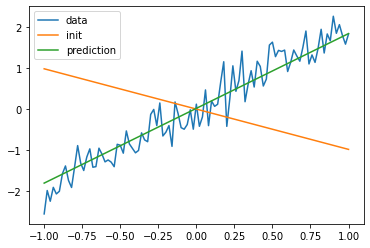

In [12]:
plt.plot(X, Y, label='data')
plt.plot(X, w_init*X + b_init, label='init')
plt.plot(X, w*X + b, label='prediction')
plt.legend()
plt.show()

## Build a linear regression model for multiple independent variable

In [17]:
#load the dataset
data = load_boston()
#convert the dataset into a Pandas dataframe and add the target column named 'Price'
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Price'] = data.target

In [18]:
#One-Hot Encode the CHAS column
df = pd.get_dummies(df, columns=['CHAS'], drop_first=True)
#define the features and the labels, X and y
X = df.drop(['Price'], axis=1)
y = df['Price']

#split the features and labels into  train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#rescale the data to be robust to outliers
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
X_train.shape

(404, 13)

In [ ]:
model = Sequential()
model.add(Dense(15, input_dim=11, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='linear'))

In [21]:
model = keras.Sequential([
                          keras.layers.Dense(units=13,input_dim=13, activation='relu'),
                          keras.layers.Dense(units=13,input_dim=13, activation='relu'),
                          keras.layers.Dense(units=1,input_dim=13, activation='linear')
                          ])
model.compile(optimizer='sgd',
              loss='mse',metrics=['mse', 'mae'])


In [23]:
model.fit(X_train, y_train, epochs=100,validation_split=0.2)

Epoch 1/100
11/11 [==============================] - 0s 18ms/step - loss: 6.0163 - mse: 6.0163 - mae: 1.8349 - val_loss: 7.1860 - val_mse: 7.1860 - val_mae: 1.9758
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 4.6199 - mse: 4.6199 - mae: 1.6195 - val_loss: 8.1830 - val_mse: 8.1830 - val_mae: 2.2651
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 4.5726 - mse: 4.5726 - mae: 1.6480 - val_loss: 5.7630 - val_mse: 5.7630 - val_mae: 1.6552
Epoch 4/100
11/11 [==============================] - 0s 3ms/step - loss: 4.4622 - mse: 4.4622 - mae: 1.5993 - val_loss: 12.1045 - val_mse: 12.1045 - val_mae: 2.5676
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 5.1776 - mse: 5.1776 - mae: 1.7115 - val_loss: 7.2099 - val_mse: 7.2099 - val_mae: 2.0105
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 4.3826 - mse: 4.3826 - mae: 1.6143 - val_loss: 10.3540 - val_mse: 10.3540 - val_mae: 2.3641
Epoch 7/100
11/11

In [24]:
model.evaluate(X_test, y_test, batch_size=128)


1/1 [==============================] - 0s 17ms/step - loss: 7.8229 - mse: 7.8229 - mae: 2.1632


[7.822910308837891, 7.822910308837891, 2.163228750228882]

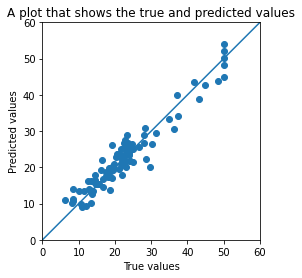

In [25]:
y_pred = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred)
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.title('A plot that shows the true and predicted values')
plt.xlim([0, 60])
plt.ylim([0, 60])
plt.plot([0, 60], [0, 60])